In [1]:
using DelimitedFiles
using Plots
pyplot()
# using NaNMath
using Statistics

In [2]:
nanmean(x) = mean(filter(!isnan, x))

nanmean (generic function with 1 method)

In [3]:
file = readdlm("exoplanet-data.txt");
t = file[:, 1];
light = file[:, 2];

In [4]:
#replacing NaNs with mean of 4 nearest points
for i in findall(isnan.(light))
    light[i] = nanmean(light[i-2:i+2])
end

# sanity check
print(sum(isnan.(light)))

0

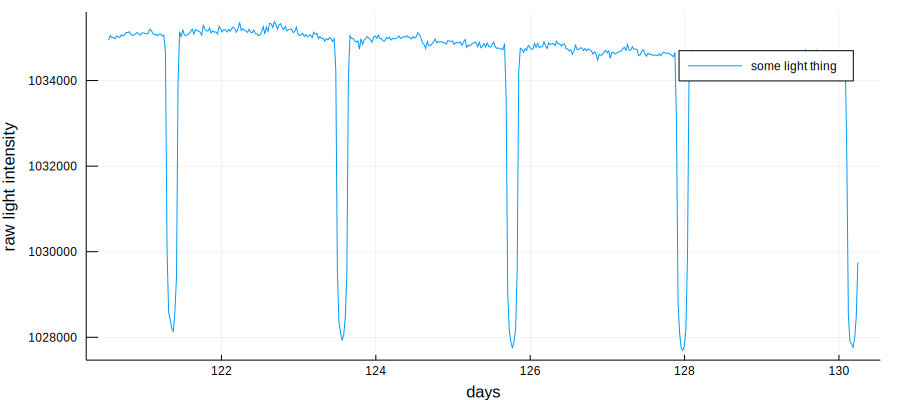

In [5]:
gr(size = (900, 400))
plot(t, light, label = "some light thing")

xlabel!("days")
ylabel!("raw light intensity")
# xlims!((125, 125.2))

# a) estimating orbital period of the planet

In [6]:
function flatsmooth(light, t, degree)
    lower = Int((degree-1)/2)
    upper = Int((degree+1)/2)
#     counter = 0
    l = length(light)
    lightsmoothed = zeros(l)
    
    for i in upper:length(light)-lower
        lightsmoothed[i] = mean(light[i-lower:i+lower])
    end
    
    for j in findall(lightsmoothed .== 0)
        lightsmoothed[j] = light[j]
    end
#     while counter < lower
#         t = deleteat!(deleteat!(t, length(t)), 1)
#         counter += 1
#     end
    return lightsmoothed, t
end

flatsmooth (generic function with 1 method)

In [7]:
plot(tsmooth3, lightsmooth3)

UndefVarError: UndefVarError: tsmooth3 not defined

In [8]:
a, b = flatsmooth(light, t, 7)

([1.03494e6, 1.03505e6, 1.03501e6, 1.03501e6, 1.03502e6, 1.03502e6, 1.03503e6, 1.03503e6, 1.03505e6, 1.03506e6  …  1.0333e6, 1.03236e6, 1.03142e6, 1.03047e6, 1.02954e6, 1.02868e6, 1.02832e6, 1.02799e6, 1.02848e6, 1.02975e6], [120.539, 120.559, 120.58, 120.6, 120.621, 120.641, 120.661, 120.682, 120.702, 120.723  …  130.061, 130.082, 130.102, 130.123, 130.143, 130.163, 130.184, 130.204, 130.225, 130.245])

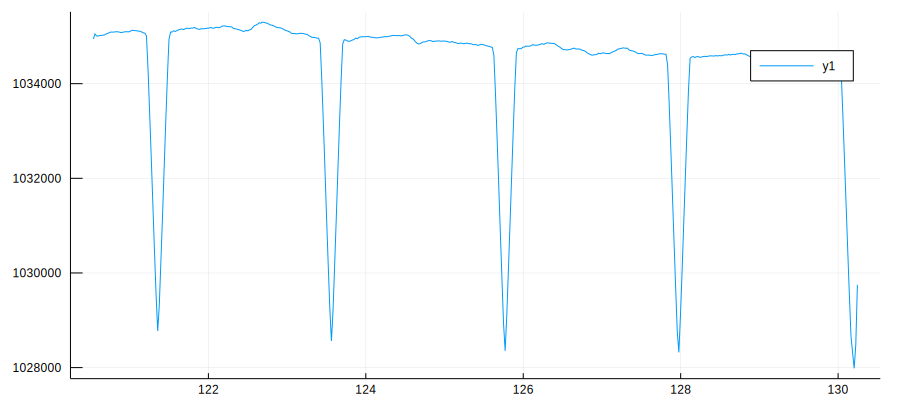

In [9]:
plot(b, a)

In [10]:
findmin(T)

UndefVarError: UndefVarError: T not defined

In [11]:
function prediction(Xtilde, weights)
    Y = 1034500*ones(size(Xtilde)[1])
    index = weights[1]
    while index < length(Y)
        Y[index] = 102800
        index += weights[2]
    end
    return Y
end

gradients(Xtilde, P, T) = 1/size(Xtilde)[1] * transpose(Xtilde) * (P - T)

function cost(Xtilde, P, T)
    array = P .- T
    cost = 1/(2*size(Xtilde)[1]) * array'array
end

cost (generic function with 1 method)

In [12]:
X = 1.0*t;
T = 1.0*a;
# drift = (maximum(T[findall(T.>1032000)])-minimum(T[findall(T.>1032000)]))/length(T)
# for i in 1:length(T)
#     T[i] += i*drift
# end

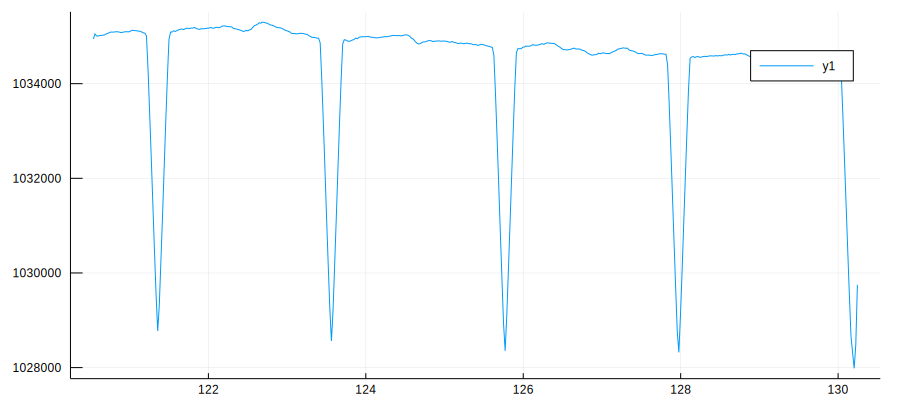

In [13]:
plot(X, T)

In [14]:
ns = length(T)
Xtilde = ones(ns, 2)
Xtilde[:, 1] = X

476-element Array{Float64,1}:
 120.53881583872862
 120.55925017884147
 120.57968441895355
 120.60011885905988
 120.62055319923093
 120.64098743934301
 120.66142177950678
 120.6818562196786 
 120.70229045979067
 120.72272479995445
 120.74315924018447
 120.76359348035476
 120.78402782051853
   ⋮               
 130.02034789774189
 130.04078223255783
 130.0612164672566 
 130.08165080194885
 130.10208523664915
 130.1225194712315 
 130.14295380580734
 130.1633882403912 
 130.18382257497433
 130.204256809433  
 130.2246911438997 
 130.24512557836715

In [15]:
nu = 100
C = zeros(nu)
w = [40, 100]

for i in 1:nu
    P = prediction(Xtilde, w)
    grads = gradients(Xtilde, P, T)
#     C[i] = cost(Xtilde, P, T)
    w = Int.(floor.(w-grads))
end

BoundsError: BoundsError: attempt to access 476-element Array{Float64,1} at index [-5370]

In [16]:
plot(X, T)
plot!(X, P)

UndefVarError: UndefVarError: P not defined

In [17]:
P = prediction(Xtilde, w)

BoundsError: BoundsError: attempt to access 476-element Array{Float64,1} at index [-5370]

In [18]:
w

2-element Array{Int64,1}:
 -5370
   434

In [19]:
Y = 1034500*ones(size(Xtilde)[1])

476-element Array{Float64,1}:
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 ⋮       
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6
 1.0345e6

In [20]:
gradients(Xtilde, P, T)

UndefVarError: UndefVarError: P not defined

# b) ratio between radii

In [23]:
findall(a.< 1034000)

58-element Array{Int64,1}:
  36
  37
  38
  39
  40
  41
  42
  43
  44
  45
  46
 144
 145
   ⋮
 370
 371
 467
 468
 469
 470
 471
 472
 473
 474
 475
 476

In [25]:
a[41]

1.0287742142857143e6

In [27]:
findall(b.<122)

72-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 61
 62
 63
 64
 65
 66
 67
 68
 69
 70
 71
 72

In [29]:
times = b[findall(b.<122)]
lights = a[findall(b.<122)]

72-element Array{Float64,1}:
 1.0349449375e6      
 1.0350510625e6      
 1.03500875e6        
 1.0350079821428572e6
 1.0350170535714285e6
 1.0350202410714285e6
 1.0350250178571428e6
 1.0350316785714285e6
 1.0350528571428572e6
 1.0350641428571428e6
 1.0350807946428572e6
 1.0350912946428572e6
 1.035088625e6       
 ⋮                   
 1.0351673482142857e6
 1.0351762767857143e6
 1.0351743482142857e6
 1.0351891785714285e6
 1.0351642767857143e6
 1.0351559464285715e6
 1.0351459017857143e6
 1.0351615982142857e6
 1.0351589642857143e6
 1.0351624196428572e6
 1.0351659285714285e6
 1.035174e6          

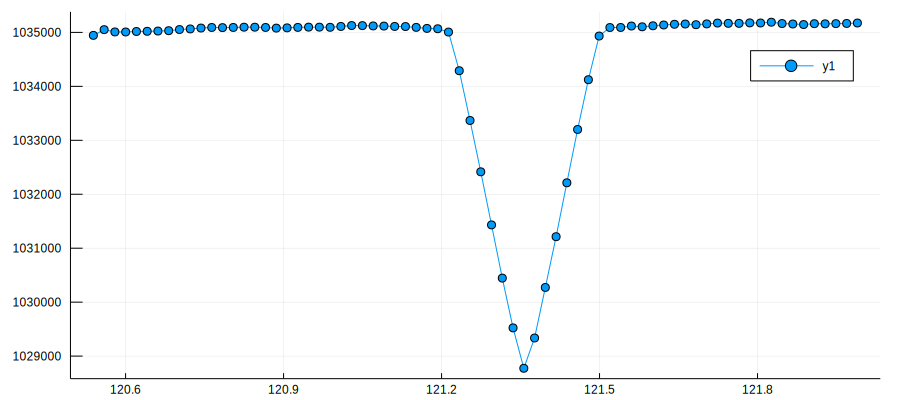

In [32]:
plot(times, lights, m = :circle)

In [34]:
Fhigh = mean(lights[findall(lights.>1034500)])

1.0351017982748185e6

In [35]:
Flow = minimum(lights)

1.0287742142857143e6

In [36]:
ratio = sqrt((Fhigh-Flow)/Fhigh)

0.07818571780811794

In [39]:
findmin(lights)

(1.0287742142857143e6, 41)

In [64]:
i = 1
lows = zeros(0)
while i < length(light)
    last = i+100
    if last > length(light)
        last = length(light)
    end
    append!(lows, argmin(light[i:last])+i)
#     println(i)
    i += 100
end
lows = Int.(lows.-1)

5-element Array{Int64,1}:
  42
 149
 257
 365
 473

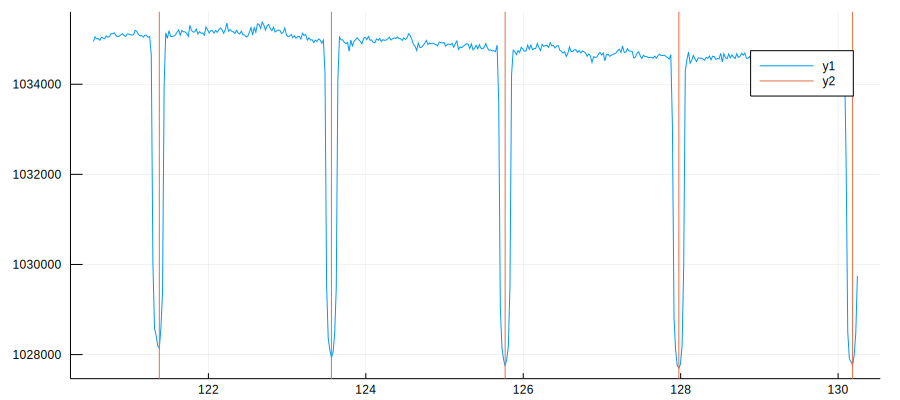

In [65]:
plot(t, light)
vline!(t[lows])

# a) period

In [66]:
mean(t[lows[i+1]]-t[lows[i]] for i in 1:4)

2.2017997215898504

# c) transit time

In [68]:
test= light[1:100]

100-element Array{Float64,1}:
 1.0349449375e6
 1.0350510625e6
 1.03500875e6  
 1.035009625e6 
 1.0349754375e6
 1.0350413125e6
 1.03502475e6  
 1.0350084375e6
 1.035073375e6 
 1.0350421875e6
 1.03505625e6  
 1.0351236875e6
 1.0351203125e6
 ⋮             
 1.0351266875e6
 1.0351978125e6
 1.0351333125e6
 1.0351143125e6
 1.03517875e6  
 1.0350976875e6
 1.0350918125e6
 1.0350516875e6
 1.0350671875e6
 1.0351515e6   
 1.0352571875e6
 1.03508825e6  

┌ Warning: Skipped marker arg o.
└ @ Plots /home/yuanyi/.julia/packages/Plots/Ufx0i/src/args.jl:744
┌ Warning: Skipped marker arg ^.
└ @ Plots /home/yuanyi/.julia/packages/Plots/Ufx0i/src/args.jl:744


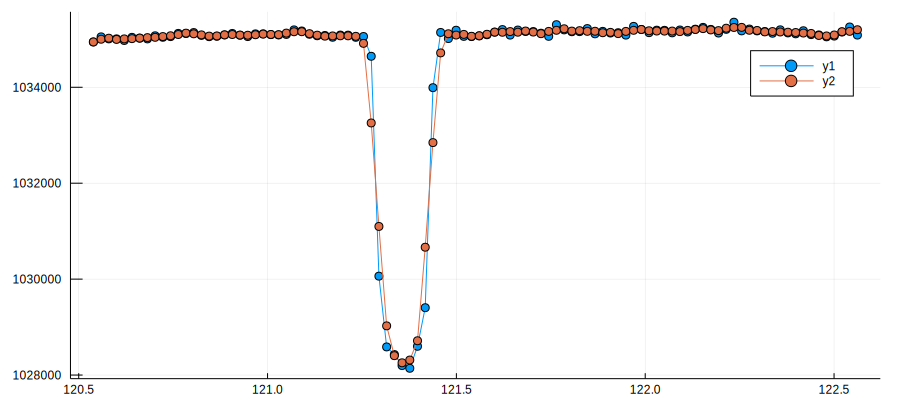

In [87]:
plot(t[1:100], test, marker = "o")
plot!(time3[1:100], light3[1:100], marker = "^")

In [86]:
light3, time3 = flatsmooth(light, t, 3)

([1.03494e6, 1.035e6, 1.03502e6, 1.035e6, 1.03501e6, 1.03501e6, 1.03502e6, 1.03504e6, 1.03504e6, 1.03506e6  …  1.03448e6, 1.03376e6, 1.03176e6, 1.02956e6, 1.02808e6, 1.02784e6, 1.02787e6, 1.02808e6, 1.02874e6, 1.02975e6], [120.539, 120.559, 120.58, 120.6, 120.621, 120.641, 120.661, 120.682, 120.702, 120.723  …  130.061, 130.082, 130.102, 130.123, 130.143, 130.163, 130.184, 130.204, 130.225, 130.245])

In [116]:
difference = abs.(light3.-light);
highs = intersect(findall(difference .< 200), findall(light .> 1034000));

In [146]:
starts = zeros(0)
ends = zeros(0)
for i in 1:length(highs)-1
    if highs[i+1]-highs[i] > 1
        append!(starts, highs[i])
        append!(ends, highs[i+1])
    end
end
starts = Int.(starts)
ends = Int.(ends)

4-element Array{Int64,1}:
  47
 155
 262
 370

In [148]:
transittime = mean(t[ends].-t[starts])

0.22988624316712958

In [136]:
1 in highs == 1 && 2 in highs == 1

false

In [134]:
&(1 in highs, 2 in highs)

ErrorException: syntax: invalid syntax &(Core.tuple(in(1, highs), in(2, highs)))

In [137]:
2 in highs

true